project 1  avocado

In [ ]:
import pandas as pd
import ast  # For parsing the actors_list

# Sample data from context (using the first few rows)
movie_data = """0 | star_rating | title | content_rating | genre | duration | actors_list
1 | 9.3 | The Shawshank Redemption | R | Crime | 142 | ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']
2 | 9.2 | The Godfather | R | Crime | 175 | ['Marlon Brando', 'Al Pacino', 'James Caan']
3 | 9.1 | The Godfather: Part II | R | Crime | 200 | ['Al Pacino', 'Robert De Niro', 'Robert Duvall']
4 | 9.0 | The Dark Knight | PG-13 | Action | 152 | ['Christian Bale', 'Heath Ledger', 'Aaron Eckhart']
5 | 8.9 | Pulp Fiction | R | Crime | 154 | ['John Travolta', 'Uma Thurman', 'Samuel L. Jackson']"""

def parse_movie_data(data):
    lines = data.strip().split('\n')
    headers = [h.strip() for h in lines[0].split(' | ')]

    movie_data = []
    for line in lines[1:]:
        parts = [p.strip() for p in line.split(' | ')]
        movie_data.append(parts)

    df = pd.DataFrame(movie_data, columns=headers)

    # Convert data types
    df['star_rating'] = pd.to_numeric(df['star_rating'])
    df['duration'] = pd.to_numeric(df['duration'])

    # Parse actors_list
    df['actors_list'] = df['actors_list'].apply(ast.literal_eval)

    return df

# Load the data
movies_df = parse_movie_data(movie_data)
print("Data loaded successfully!")
print(f"Total movies: {len(movies_df)}")

Data loaded successfully!
Total movies: 5


In [ ]:
# Find the top 5 highest-rated movies
top_rated = movies_df.sort_values('star_rating', ascending=False).head(5)

print("Top 5 Highest-Rated Movies:")
print(top_rated[['title', 'star_rating', 'genre']].to_string(index=False))

Top 5 Highest-Rated Movies:
                   title  star_rating  genre
The Shawshank Redemption          9.3  Crime
           The Godfather          9.2  Crime
  The Godfather: Part II          9.1  Crime
         The Dark Knight          9.0 Action
            Pulp Fiction          8.9  Crime


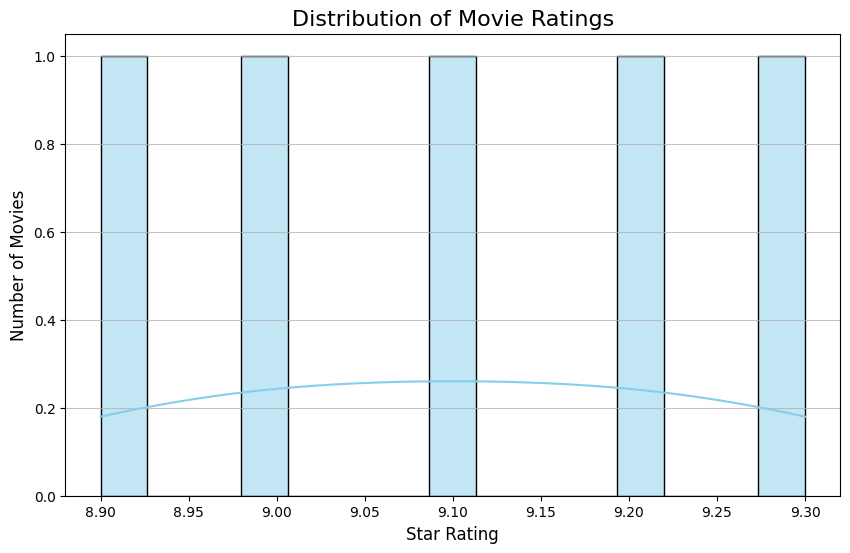

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['star_rating'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Filter for Action movies and sort by duration (shortest first)
action_movies = movies_df[movies_df['genre'] == 'Action'].sort_values('duration')

print("Action Movies Sorted by Duration (Shortest First):")
print(action_movies[['title', 'duration', 'star_rating']].to_string(index=False))

Action Movies Sorted by Duration (Shortest First):
          title  duration  star_rating
The Dark Knight       152          9.0


project 2 car prices

      0     1  enginesize  price
0  15.0  11.0        19.0   17.0
1   9.0   2.0         4.0   13.0
2  12.0  12.0        13.0    3.0


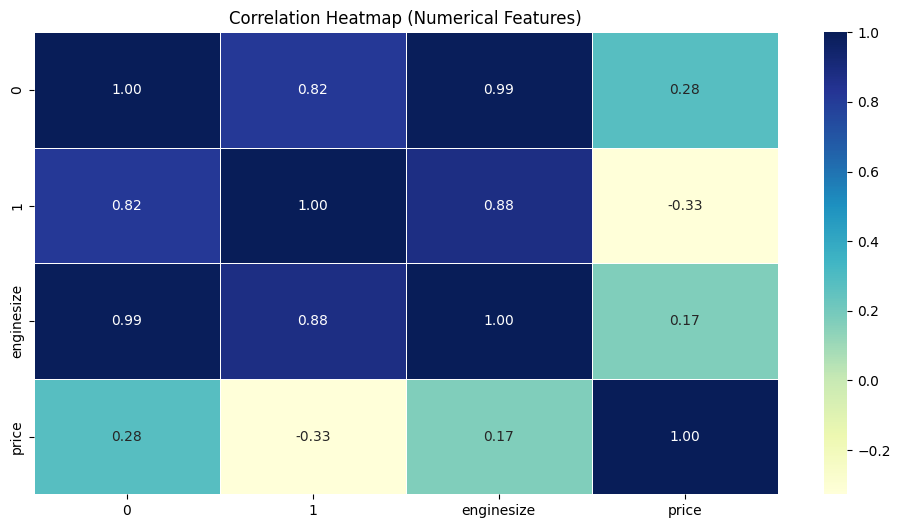

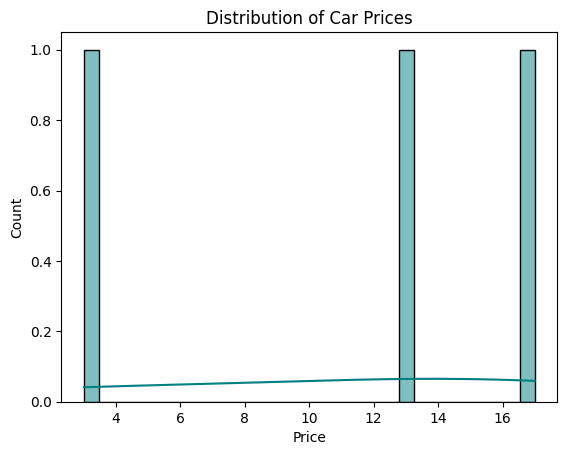

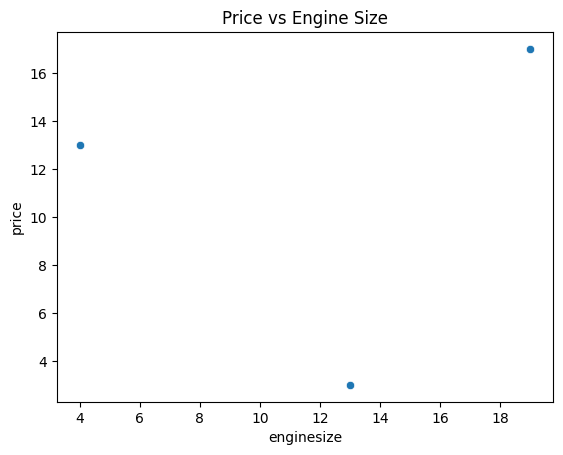

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset with no header and rename columns
df = pd.read_csv('CarPrice.csv', header=None)
df = df.rename(columns={3: 'price', 2: 'enginesize'}) # Assuming column 3 is price, 2 is enginesize based on the previous successful execution.

# View structure
print(df.head())

# --- Correlation Heatmap ---
plt.figure(figsize=(12, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# --- Distribution of Car Prices ---
sns.histplot(df['price'], kde=True, bins=30, color='teal')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.show()

# --- Price vs Engine Size ---
sns.scatterplot(x='enginesize', y='price', data=df, palette='Set2')
plt.title("Price vs Engine Size")
plt.show()

project 3 iris

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


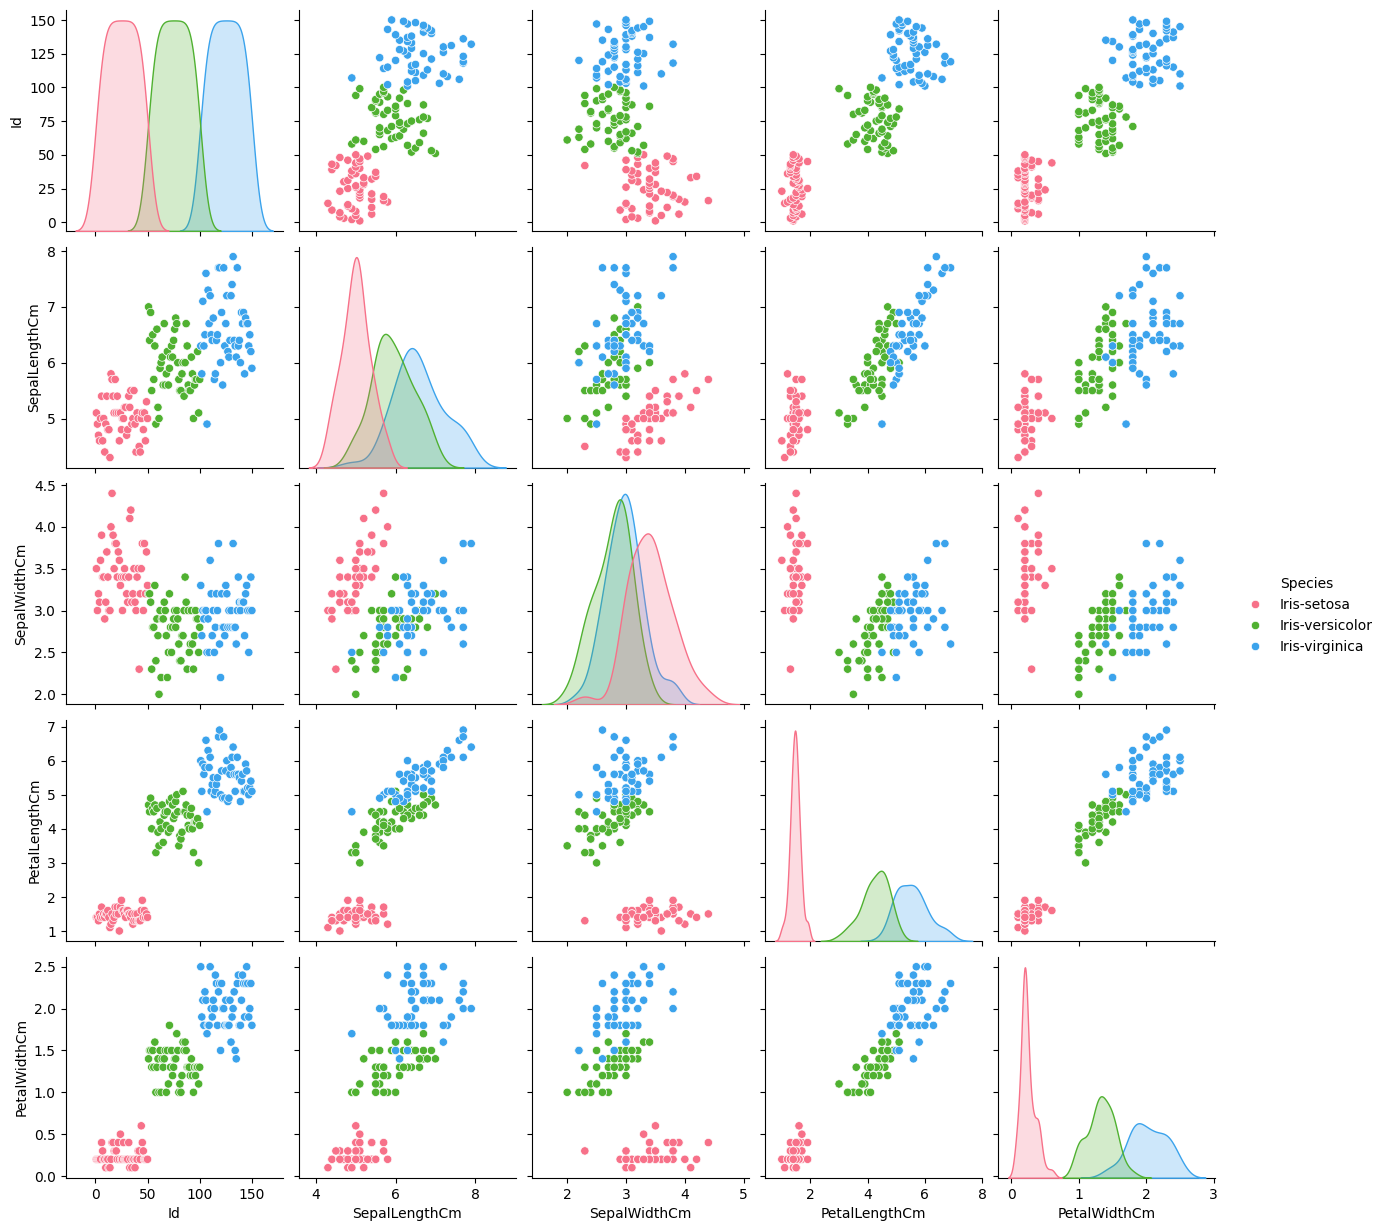

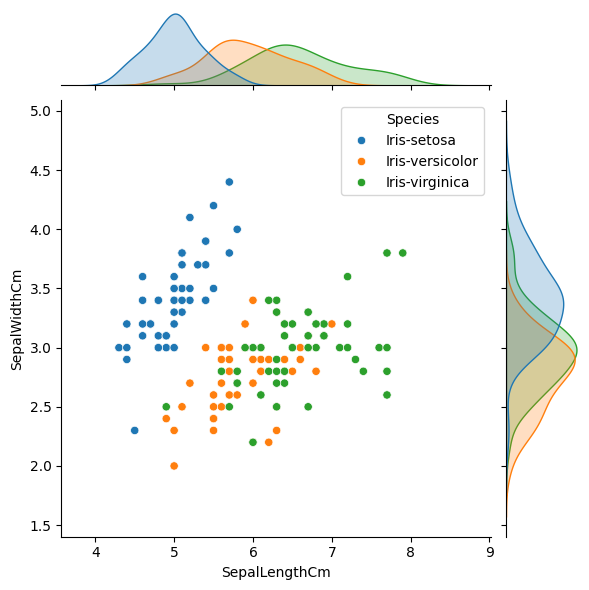

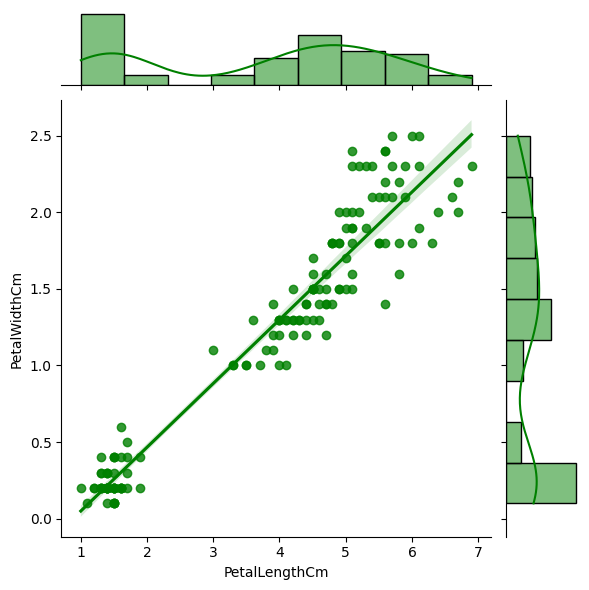

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = pd.read_csv('Iris.csv')

# Quick view
print(iris.head())

# Pairplot for all features
sns.pairplot(iris, hue='Species', palette='husl')
plt.show()

# Jointplot: Sepal Length vs Sepal Width
sns.jointplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species', kind='scatter')
plt.show()

# Jointplot with regression
sns.jointplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', kind='reg', color='green')
plt.show()


project4 Nhanes

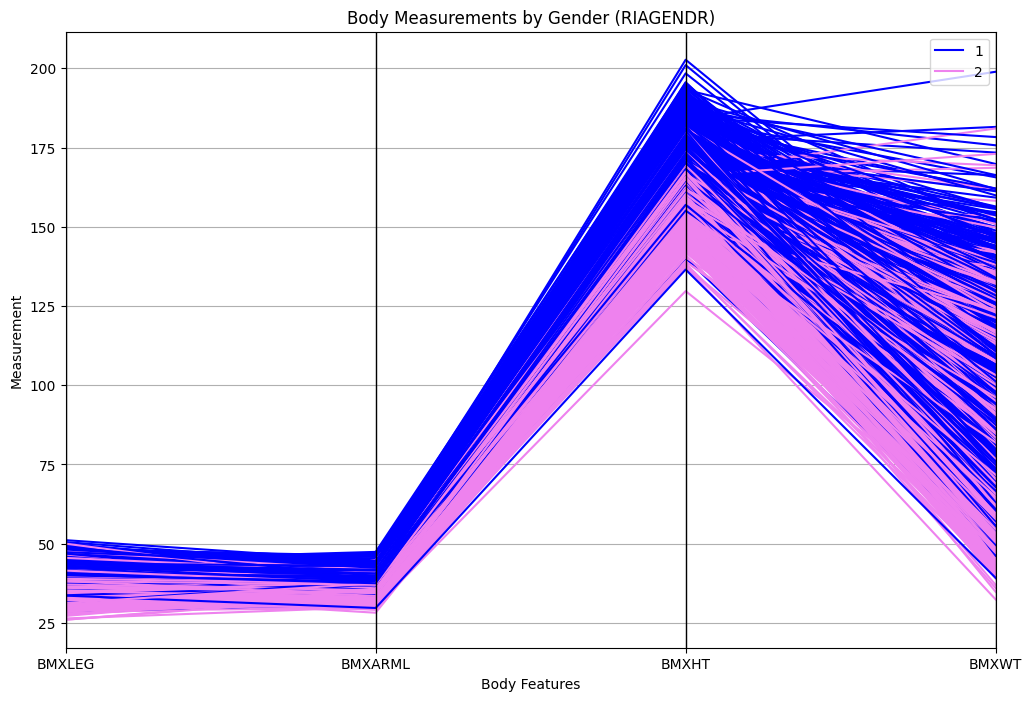

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load dataset
df = pd.read_csv('NHANES.csv')

# Preview relevant features
features = ['BMXLEG', 'BMXARML', 'BMXHT', 'BMXWT', 'RIAGENDR']
subset = df[features].dropna()

# Parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(subset, 'RIAGENDR', color=['blue', 'violet'])
plt.title('Body Measurements by Gender (RIAGENDR)')
plt.xlabel('Body Features')
plt.ylabel('Measurement')
plt.grid(True)
plt.show()


project 5
superstore_sales

In [ ]:
pip install xlrd


In [ ]:
import pandas as pd

# Load the Excel file
orders = pd.read_excel('Superstore_Sales.xls')

# View top 5 rows
print(orders.head())

# Drop a single column
orders.drop('Row ID', axis=1, inplace=True)

# Drop multiple columns
orders.drop(['Order Date', 'Order Priority'], axis=1, inplace=True)

# Drop a row
orders.drop(1, axis=0, inplace=True)

# Drop multiple rows
orders.drop([2, 3], axis=0, inplace=True)

# Summary statistics
print(orders.describe())


   Row ID  Order ID Order Date Order Priority  Order Quantity      Sales  \
0       1         3 2010-10-13            Low               6   261.5400   
1       2         6 2012-02-20  Not Specified               2     6.9300   
2       3        32 2011-07-15           High              26  2808.0800   
3       4        32 2011-07-15           High              24  1761.4000   
4       5        32 2011-07-15           High              23   160.2335   

   Discount       Ship Mode    Profit  Unit Price  ...       Customer Name  \
0      0.04     Regular Air  -213.250       38.94  ...  Muhammed MacIntyre   
1      0.01     Regular Air    -4.640        2.08  ...         Ruben Dartt   
2      0.07     Regular Air  1054.820      107.53  ...       Liz Pelletier   
3      0.09  Delivery Truck -1748.560       70.89  ...       Liz Pelletier   
4      0.04     Regular Air   -85.129        7.99  ...       Liz Pelletier   

  Province   Region Customer Segment Product Category  \
0  Nunavut  Nunav

project 6 Titanic_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

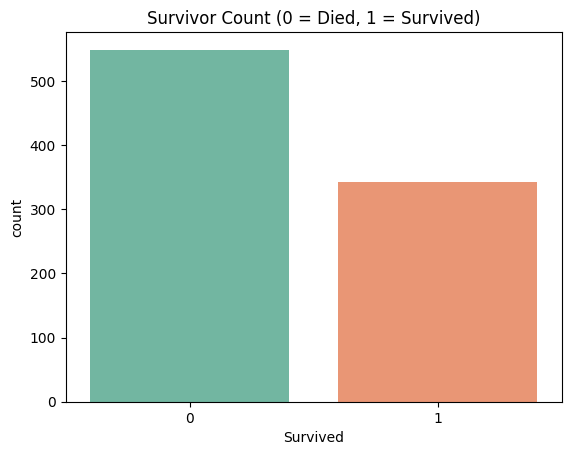

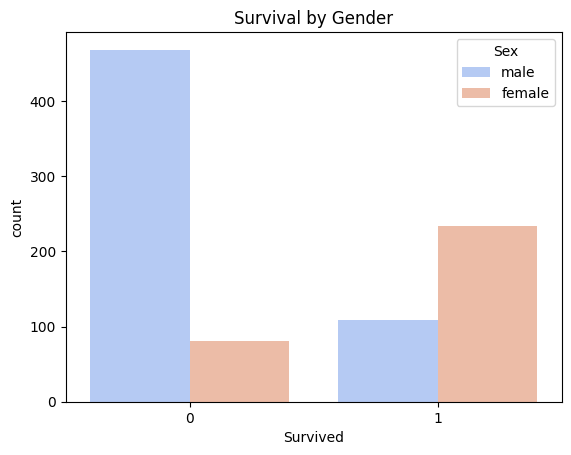

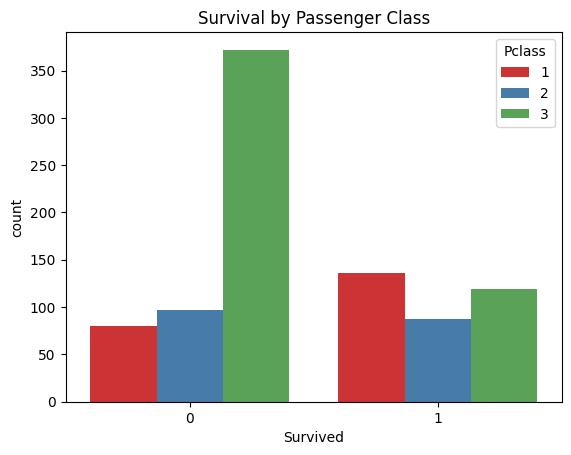

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
titanic_df = pd.read_csv('Titanic_df.csv')

# Check structure
print(titanic_df.info())
print(titanic_df.head())

# --- Countplot of Survivors ---
sns.countplot(x='Survived', data=titanic_df, palette='Set2')
plt.title("Survivor Count (0 = Died, 1 = Survived)")
plt.show()

# --- Survival by Sex ---
sns.countplot(x='Survived', hue='Sex', data=titanic_df, palette='coolwarm')
plt.title("Survival by Gender")
plt.show()

# --- Survival by Passenger Class ---
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette='Set1')
plt.title("Survival by Passenger Class")
plt.show()


project7  heights

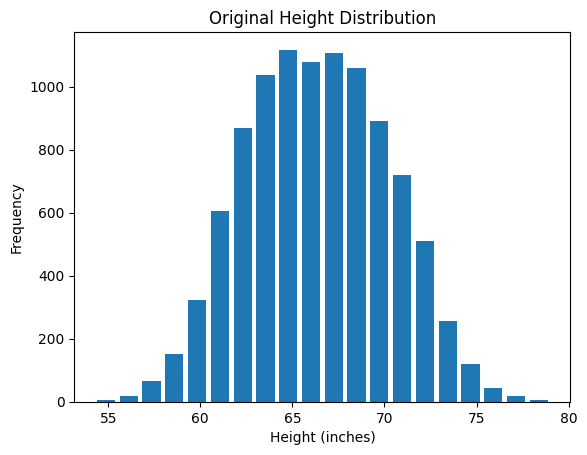

Original: (10000, 3)
After IQR filtering: (9992, 2)
After Z-score filtering: (9993, 3)


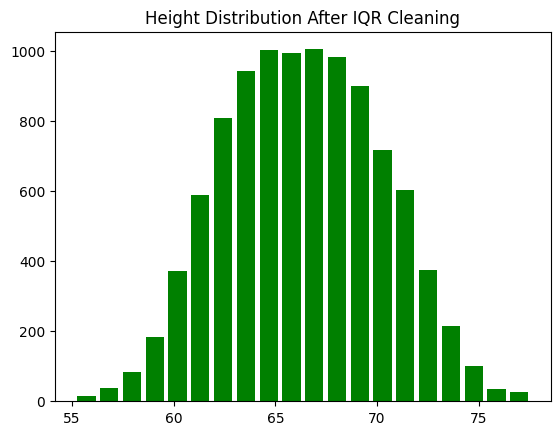

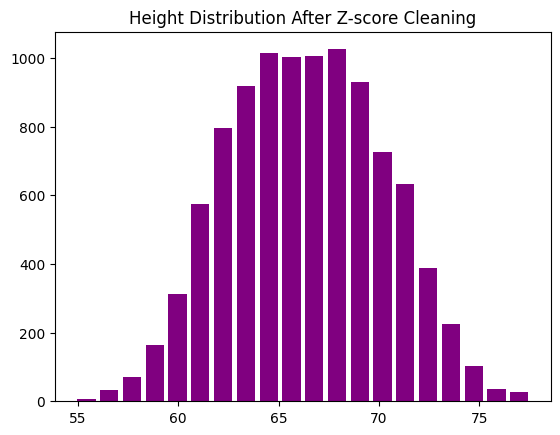

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load dataset
df = pd.read_csv('heights.csv')

# Histogram
plt.hist(df['Height'], bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.title('Original Height Distribution')
plt.show()

# IQR Method
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_iqr_clean = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]

# Z-score Method
df['zscore'] = zscore(df['Height'])
df_zscore_clean = df[(df['zscore'] >= -3) & (df['zscore'] <= 3)]

# Display shape differences
print("Original:", df.shape)
print("After IQR filtering:", df_iqr_clean.shape)
print("After Z-score filtering:", df_zscore_clean.shape)

# Plot cleaned data
plt.hist(df_iqr_clean['Height'], bins=20, rwidth=0.8, color='g')
plt.title('Height Distribution After IQR Cleaning')
plt.show()

plt.hist(df_zscore_clean['Height'], bins=20, rwidth=0.8, color='purple')
plt.title('Height Distribution After Z-score Cleaning')
plt.show()


project 8 house_prices

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


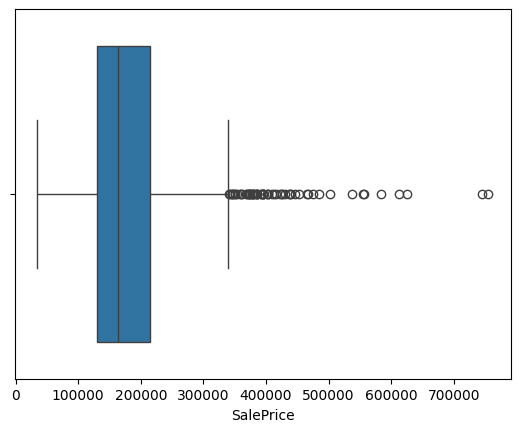

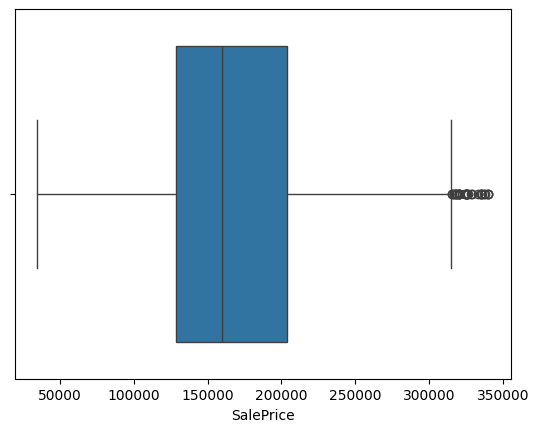

Original shape: (1460, 81)
After removing outliers: (1399, 81)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('house_prices.csv')

# Basic statistics
print(data['SalePrice'].describe())

# Boxplot to visualize outliers
sns.boxplot(x=data['SalePrice'])
plt.show()

# Calculate IQR
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
clean_data = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

# New boxplot after outlier removal
sns.boxplot(x=clean_data['SalePrice'])
plt.show()

# Check shape difference
print("Original shape:", data.shape)
print("After removing outliers:", clean_data.shape)


project 9
imdb_1000

=== BASIC ANALYSIS ===
Total movies: 9
Rating range: 8.9 - 9.3
Average rating: 9.01
Most common content rating: R


=== HIGHEST-RATED MOVIES ===
                                        title  star_rating     genre
                     The Shawshank Redemption          9.3     Crime
                                The Godfather          9.2     Crime
                       The Godfather: Part II          9.1     Crime
                              The Dark Knight          9.0    Action
                                 Pulp Fiction          8.9     Crime
                                 12 Angry Men          8.9     Drama
               The Good, the Bad and the Ugly          8.9   Western
The Lord of the Rings: The Return of the King          8.9 Adventure
                             Schindler's List          8.9 Biography


=== ANALYSIS BY GENRE ===
          star_rating            duration
                 mean count  max     mean
genre                                    
Crime      

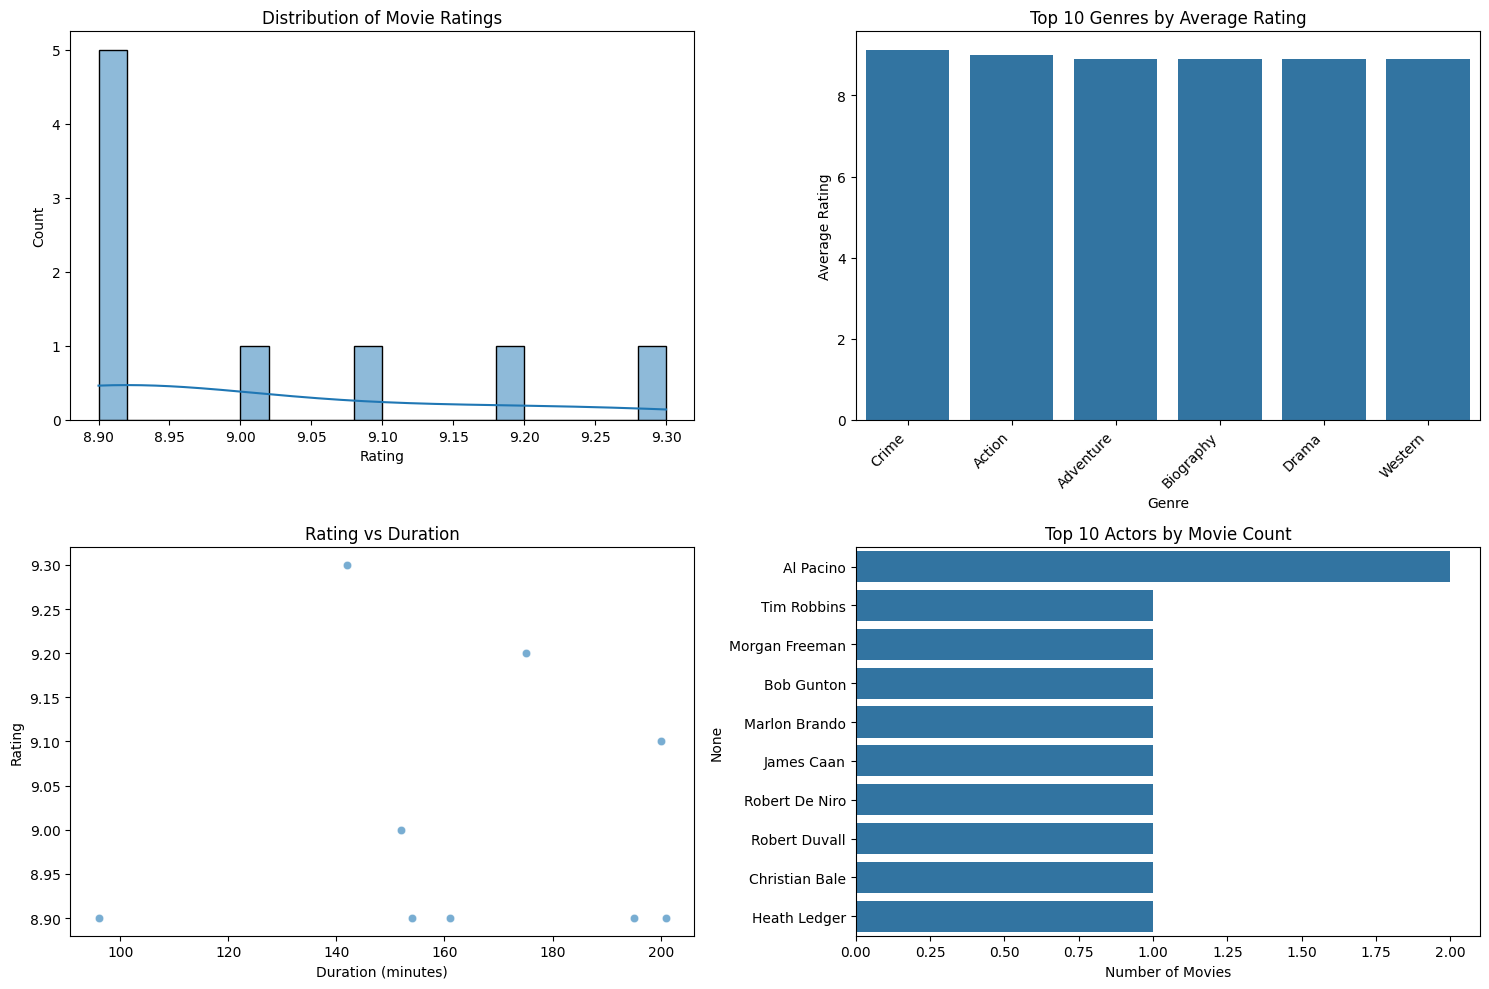

=== ADDITIONAL OPERATIONS ===
Movies with most actors:
                   title  actor_count
The Shawshank Redemption            3
           The Godfather            3
  The Godfather: Part II            3
         The Dark Knight            3
            Pulp Fiction            3


Content rating distribution:
content_rating
R            5
PG-13        2
NOT RATED    2
Name: count, dtype: int64


Movies featuring Clint Eastwood:
                         title  star_rating
The Good, the Bad and the Ugly          8.9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  # For parsing actor lists

# Sample data from context (first 10 rows shown)
data = """0 | star_rating | title | content_rating | genre | duration | actors_list
1 | 9.3 | The Shawshank Redemption | R | Crime | 142 | ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']
2 | 9.2 | The Godfather | R | Crime | 175 | ['Marlon Brando', 'Al Pacino', 'James Caan']
3 | 9.1 | The Godfather: Part II | R | Crime | 200 | ['Al Pacino', 'Robert De Niro', 'Robert Duvall']
4 | 9.0 | The Dark Knight | PG-13 | Action | 152 | ['Christian Bale', 'Heath Ledger', 'Aaron Eckhart']
5 | 8.9 | Pulp Fiction | R | Crime | 154 | ['John Travolta', 'Uma Thurman', 'Samuel L. Jackson']
6 | 8.9 | 12 Angry Men | NOT RATED | Drama | 96 | ['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam']
7 | 8.9 | The Good, the Bad and the Ugly | NOT RATED | Western | 161 | ['Clint Eastwood', 'Eli Wallach', 'Lee Van Cleef']
8 | 8.9 | The Lord of the Rings: The Return of the King | PG-13 | Adventure | 201 | ['Elijah Wood', 'Viggo Mortensen', 'Ian McKellen']
9 | 8.9 | Schindler's List | R | Biography | 195 | ['Liam Neeson', 'Ralph Fiennes', 'Ben Kingsley']"""

# Parse and load the data
def parse_movie_data(data):
    lines = data.strip().split('\n')
    headers = [h.strip() for h in lines[0].split(' | ')]

    movie_data = []
    for line in lines[1:]:
        parts = [p.strip() for p in line.split(' | ')]
        movie_data.append(parts)

    df = pd.DataFrame(movie_data, columns=headers)

    # Convert data types
    df['star_rating'] = pd.to_numeric(df['star_rating'])
    df['duration'] = pd.to_numeric(df['duration'])

    # Parse actors_list
    df['actors_list'] = df['actors_list'].apply(ast.literal_eval)

    return df

# Load the data
df = parse_movie_data(data)

# 1. Basic Analysis
print("=== BASIC ANALYSIS ===")
print(f"Total movies: {len(df)}")
print(f"Rating range: {df['star_rating'].min()} - {df['star_rating'].max()}")
print(f"Average rating: {df['star_rating'].mean():.2f}")
print(f"Most common content rating: {df['content_rating'].mode()[0]}")
print("\n")

# 2. Highest-rated movies
print("=== HIGHEST-RATED MOVIES ===")
top_movies = df.sort_values('star_rating', ascending=False).head(10)
print(top_movies[['title', 'star_rating', 'genre']].to_string(index=False))
print("\n")

# 3. Group by genre analysis
print("=== ANALYSIS BY GENRE ===")
genre_analysis = df.groupby('genre').agg({
    'star_rating': ['mean', 'count', 'max'],
    'duration': 'mean'
}).sort_values(('star_rating', 'mean'), ascending=False)
print(genre_analysis.head(10))
print("\n")

# 4. Filter and sort operations
print("=== FILTERED AND SORTED DATA ===")
# Filter: Movies with rating > 8.5 and duration < 150 minutes
filtered = df[(df['star_rating'] > 8.5) & (df['duration'] < 150)]
sorted_filtered = filtered.sort_values(['star_rating', 'duration'], ascending=[False, True])
print(f"Movies with rating > 8.5 and duration < 150 min: {len(sorted_filtered)}")
print(sorted_filtered[['title', 'star_rating', 'duration', 'genre']].to_string(index=False))
print("\n")

# 5. Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Rating distribution
plt.subplot(2, 2, 1)
sns.histplot(df['star_rating'], kde=True, bins=20)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plot 2: Top 10 genres by average rating
plt.subplot(2, 2, 2)
top_genres = genre_analysis.head(10)
sns.barplot(x=top_genres.index, y=top_genres[('star_rating', 'mean')])
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')

# Plot 3: Rating vs Duration
plt.subplot(2, 2, 3)
sns.scatterplot(x='duration', y='star_rating', data=df, alpha=0.6)
plt.title('Rating vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')

# Plot 4: Top 10 actors by movie count
plt.subplot(2, 2, 4)
all_actors = []
for actors in df['actors_list']:
    all_actors.extend(actors)
actor_counts = pd.Series(all_actors).value_counts().head(10)
sns.barplot(x=actor_counts.values, y=actor_counts.index)
plt.title('Top 10 Actors by Movie Count')
plt.xlabel('Number of Movies')

plt.tight_layout()
plt.show()

# 6. Additional operations
print("=== ADDITIONAL OPERATIONS ===")

# Operation 1: Find movies with most actors
df['actor_count'] = df['actors_list'].apply(len)
most_actors = df.sort_values('actor_count', ascending=False).head(5)
print("Movies with most actors:")
print(most_actors[['title', 'actor_count']].to_string(index=False))
print("\n")

# Operation 2: Content rating distribution
rating_dist = df['content_rating'].value_counts()
print("Content rating distribution:")
print(rating_dist)
print("\n")

# Operation 3: Find movies with specific actors
target_actor = 'Clint Eastwood'
actor_movies = df[df['actors_list'].apply(lambda x: target_actor in x)]
print(f"Movies featuring {target_actor}:")
print(actor_movies[['title', 'star_rating']].to_string(index=False))

project10
mtcars

               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


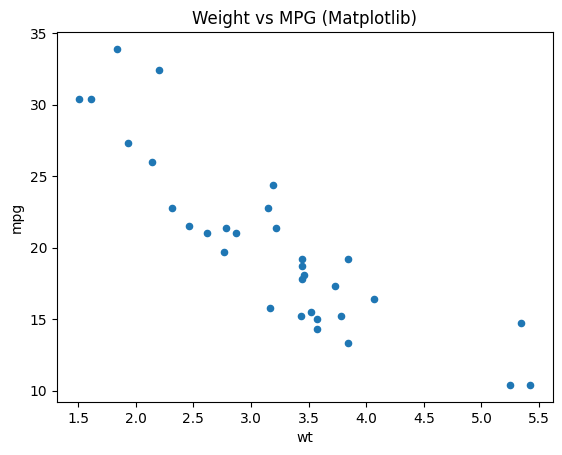

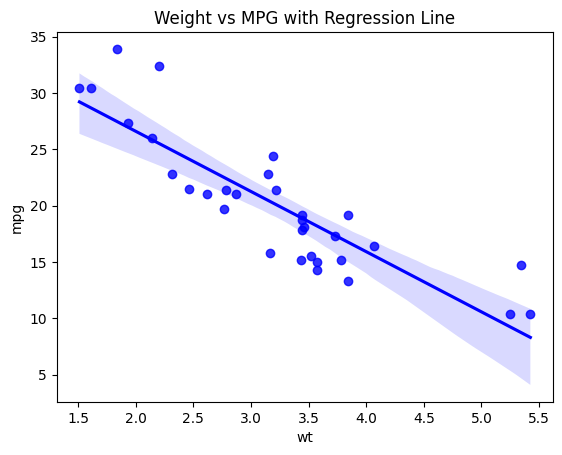

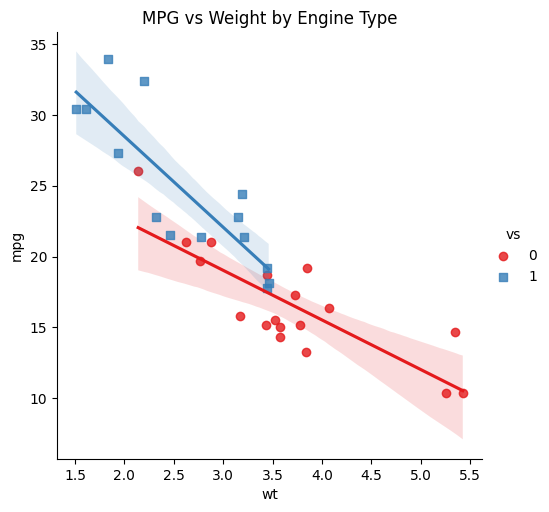

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('mtcars.csv')

# Quick preview
print(df.head())

# Scatter plot: Weight vs MPG
df.plot.scatter(x='wt', y='mpg', title='Weight vs MPG (Matplotlib)')
plt.show()

# Regression plot (Seaborn)
sns.regplot(x='wt', y='mpg', data=df, color='blue')
plt.title('Weight vs MPG with Regression Line')
plt.show()

# Enhanced regression plot with hue
sns.lmplot(x='wt', y='mpg', hue='vs', data=df, palette='Set1', markers=['o', 's'])
plt.title('MPG vs Weight by Engine Type')
plt.show()


project 11 tips

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


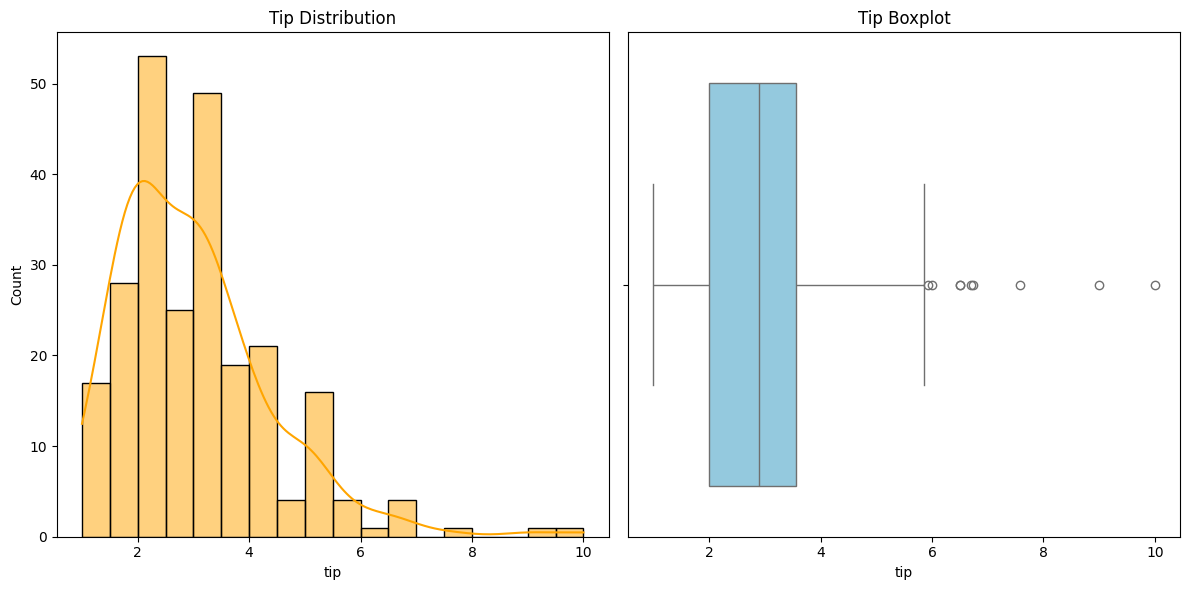

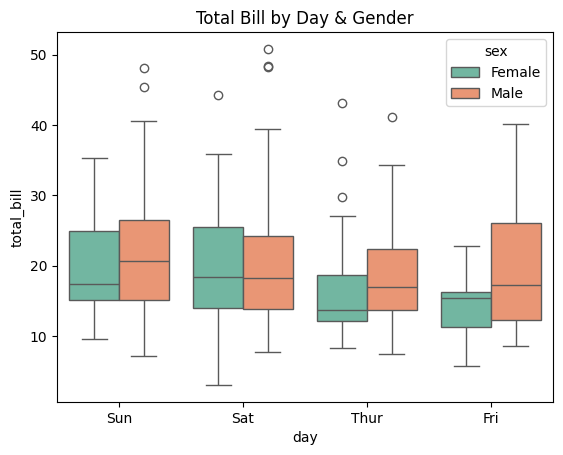

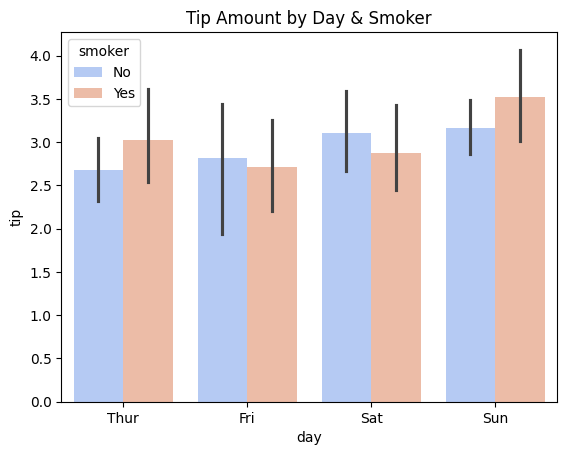

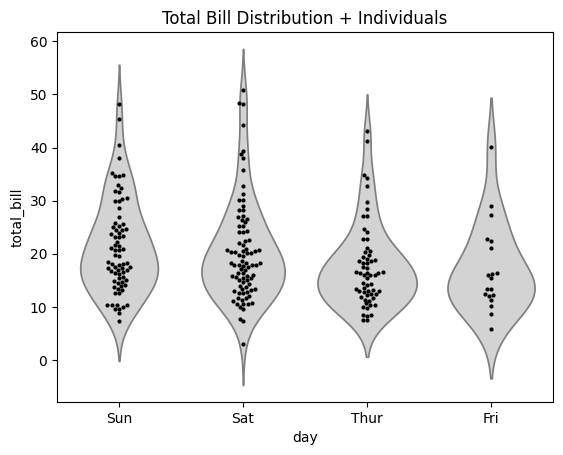

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = pd.read_csv('tips.csv')

# View top records
print(tips.head())

# --- Distribution Plot & Boxplot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(tips['tip'], kde=True, color='orange', ax=axes[0])
axes[0].set_title("Tip Distribution")

sns.boxplot(x=tips['tip'], color='skyblue', ax=axes[1])
axes[1].set_title("Tip Boxplot")

plt.tight_layout()
plt.show()

# --- Boxplots with Hue ---
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex', palette='Set2')
plt.title("Total Bill by Day & Gender")
plt.show()

# --- Bar Plot with Hue and Ordered Days ---
sns.barplot(x='day', y='tip', data=tips, hue='smoker', palette='coolwarm',
            order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title("Tip Amount by Day & Smoker")
plt.show()

# --- Swarm + Violin Combination (optional bonus) ---
sns.violinplot(x='day', y='total_bill', data=tips, inner=None, color='lightgray')
sns.swarmplot(x='day', y='total_bill', data=tips, color='black', size=3)
plt.title("Total Bill Distribution + Individuals")
plt.show()
